In [1]:
# Unzipping the compressed file
!unzip '/content/drive/MyDrive/Datasets/test_data.zip'

Archive:  /content/drive/MyDrive/Datasets/test_data.zip
   creating: test_data/
   creating: test_data/blasti/
  inflating: test_data/blasti/DSC_6396.jpg  
  inflating: test_data/blasti/DSC_6397.jpg  
  inflating: test_data/blasti/DSC_6398.jpg  
  inflating: test_data/blasti/DSC_6399.jpg  
  inflating: test_data/blasti/DSC_6400.jpg  
  inflating: test_data/blasti/DSC_6401.jpg  
  inflating: test_data/blasti/DSC_6402.jpg  
  inflating: test_data/blasti/DSC_6403.jpg  
  inflating: test_data/blasti/DSC_6405.jpg  
  inflating: test_data/blasti/DSC_6406.jpg  
  inflating: test_data/blasti/DSC_6407.jpg  
  inflating: test_data/blasti/DSC_6408.jpg  
  inflating: test_data/blasti/DSC_6409.jpg  
  inflating: test_data/blasti/DSC_6410.jpg  
  inflating: test_data/blasti/DSC_6411.jpg  
   creating: test_data/bonegl/
  inflating: test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/bonegl/DSC_4588.jpg  
  inflating: test_data/bonegl/DSC_4589.jpg  
  inflating: test_data/bonegl/DSC_4590.jpg  
  i

In [2]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [4]:
train = train_gen.flow_from_directory('/content/test_data',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)
test = train_gen.flow_from_directory('/content/test_data',
                                      target_size=(120,120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 157 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [5]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [6]:
# Building the CNN Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
20/20 [==============================] - 82s 4s/step - loss: 4.2952 - accuracy: 0.0892 - val_loss: 2.8351 - val_accuracy: 0.0573
Epoch 2/10
20/20 [==============================] - 79s 4s/step - loss: 2.7695 - accuracy: 0.0637 - val_loss: 2.6758 - val_accuracy: 0.1529
Epoch 3/10
20/20 [==============================] - 80s 4s/step - loss: 2.6710 - accuracy: 0.1465 - val_loss: 2.5361 - val_accuracy: 0.2166
Epoch 4/10
20/20 [==============================] - 79s 4s/step - loss: 2.5231 - accuracy: 0.1656 - val_loss: 2.4511 - val_accuracy: 0.2166
Epoch 5/10
20/20 [==============================] - 79s 4s/step - loss: 2.4204 - accuracy: 0.2166 - val_loss: 2.2128 - val_accuracy: 0.2293
Epoch 6/10
20/20 [==============================] - 122s 6s/step - loss: 2.2297 - accuracy: 0.2930 - val_loss: 2.0399 - val_accuracy: 0.3057
Epoch 7/10
20/20 [==============================] - 81s 4s/step - loss: 1.9900 - accuracy: 0.3439 - val_loss: 1.8611 - val_accuracy: 0.4013
Epoch 8/10
20/20 [=

# Model Tuning

In [9]:
model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120,120,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 36)      

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train,batch_size=8,validation_data=test,epochs=100)

Epoch 1/100
20/20 [==============================] - 112s 5s/step - loss: 2.7696 - accuracy: 0.0637 - val_loss: 2.7364 - val_accuracy: 0.0701
Epoch 2/100
20/20 [==============================] - 99s 5s/step - loss: 2.7216 - accuracy: 0.0701 - val_loss: 2.6946 - val_accuracy: 0.0701
Epoch 3/100
20/20 [==============================] - 100s 5s/step - loss: 2.6935 - accuracy: 0.0764 - val_loss: 2.6475 - val_accuracy: 0.1146
Epoch 4/100
20/20 [==============================] - 98s 5s/step - loss: 2.6377 - accuracy: 0.1083 - val_loss: 2.6226 - val_accuracy: 0.0892
Epoch 5/100
20/20 [==============================] - 99s 5s/step - loss: 2.6415 - accuracy: 0.1401 - val_loss: 2.5341 - val_accuracy: 0.1338
Epoch 6/100
20/20 [==============================] - 132s 7s/step - loss: 2.5615 - accuracy: 0.1465 - val_loss: 2.5041 - val_accuracy: 0.1146
Epoch 7/100
20/20 [==============================] - 99s 5s/step - loss: 2.4955 - accuracy: 0.1529 - val_loss: 2.4083 - val_accuracy: 0.2293
Epoch 8/10

In [38]:
model.save('birdModel.h5')

In [13]:
# Testing 

import numpy as np
from tensorflow.keras.preprocessing import image

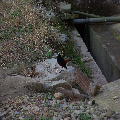

In [34]:
img = image.load_img('/content/test_data/wcrsrt/100_4464.JPG',target_size=(120,120))
img

In [35]:
img = image.img_to_array(img)
img

array([[[ 66.,  59.,  51.],
        [ 63.,  63.,  55.],
        [ 87.,  86.,  84.],
        ...,
        [ 51.,  49.,  54.],
        [ 47.,  43.,  44.],
        [ 59.,  52.,  59.]],

       [[ 63.,  64.,  46.],
        [ 52.,  54.,  49.],
        [ 94.,  99., 102.],
        ...,
        [ 32.,  29.,  38.],
        [ 39.,  34.,  38.],
        [ 86.,  83., 100.]],

       [[ 63.,  66.,  47.],
        [ 83.,  92.,  75.],
        [ 47.,  32.,  29.],
        ...,
        [ 71.,  71.,  69.],
        [ 42.,  36.,  40.],
        [ 79.,  73.,  85.]],

       ...,

       [[ 45.,  43.,  46.],
        [ 41.,  43.,  42.],
        [ 53.,  47.,  61.],
        ...,
        [ 73.,  86.,  79.],
        [ 78.,  90.,  88.],
        [ 67.,  56.,  64.]],

       [[ 36.,  32.,  31.],
        [ 57.,  65.,  52.],
        [ 90.,  97., 107.],
        ...,
        [ 60.,  60.,  52.],
        [ 58.,  58.,  68.],
        [ 96.,  93., 102.]],

       [[ 35.,  33.,  36.],
        [ 36.,  35.,  43.],
        [ 76.,  

In [36]:
img = np.expand_dims(img,axis=0)
img

array([[[[ 66.,  59.,  51.],
         [ 63.,  63.,  55.],
         [ 87.,  86.,  84.],
         ...,
         [ 51.,  49.,  54.],
         [ 47.,  43.,  44.],
         [ 59.,  52.,  59.]],

        [[ 63.,  64.,  46.],
         [ 52.,  54.,  49.],
         [ 94.,  99., 102.],
         ...,
         [ 32.,  29.,  38.],
         [ 39.,  34.,  38.],
         [ 86.,  83., 100.]],

        [[ 63.,  66.,  47.],
         [ 83.,  92.,  75.],
         [ 47.,  32.,  29.],
         ...,
         [ 71.,  71.,  69.],
         [ 42.,  36.,  40.],
         [ 79.,  73.,  85.]],

        ...,

        [[ 45.,  43.,  46.],
         [ 41.,  43.,  42.],
         [ 53.,  47.,  61.],
         ...,
         [ 73.,  86.,  79.],
         [ 78.,  90.,  88.],
         [ 67.,  56.,  64.]],

        [[ 36.,  32.,  31.],
         [ 57.,  65.,  52.],
         [ 90.,  97., 107.],
         ...,
         [ 60.,  60.,  52.],
         [ 58.,  58.,  68.],
         [ 96.,  93., 102.]],

        [[ 35.,  33.,  36.],
       

In [37]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 18ms/step


9